# Kunskapskontroll_ds24_sql

### Teoretiska Frågor

1. Beskriv kort hur en relationsdatabas fungerar.
- En relationsdatabas är en typ av databas där datan är oganiserad i tabell-form bestående av många rader och kolumner. Det finns en tydlig relation mellan de olika tabellerna i en databas.
2. Vad menas med “CRUD”-flödet?
- CRUD är en akronym som står för Create, Read, Update och Delete. Create funktionen används för att lägga till nya rader i en tabell. Read används för att göra en query som läser ut data från en tabell. Update syftar till att uppdatera en gammal data i en tabell medan Delete funktionen används för att radera ut data från en existerande tabell.
3. Beskriv kort vad en “left join” och en “inner join” är. Varför använder man det?
- En "left join" och en “inner join” används för att göra en koppling mellan olika tabeller i en databas. En "left join" används främst för att få fram all data från en tabell som man angett som den vänstra tabellen medan "inner join" används för att få fram data som är gemensam för båda tabellerna som man jobbar med i en viss query.
4. Beskriv kort vad indexering i SQL innebär.
- Indexering är en metod som används för att leta upp data eller matchande result en tabell som uppfyller vissa kreterier på ett snabbare sätt.
5. Beskriv kort vad en vy i SQL är.
- En vy är en tabell som man själv skapar för ett specifikt ändamål med hjälp av en query som man ställer till databasen.
6. Beskriv kort vad en lagrad procedur i SQL är.
- En lagrad procedur är precis som namnet antyder, en sparad kod som går att återanvändas flera gånger. Dess syfte är att underlätta användningen av en kod men också för att behålla konsistenta resultat i de fall koden används av flera individer.

In [96]:
! pip install sqlalchemy
! pip install pyodbc

In [170]:
from sqlalchemy import create_engine, URL, inspect
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


In [186]:
SERVER = 'localhost'
DATABAS = 'AdventureWorks2022'

connection_string = f'DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={SERVER};DATABASE={DATABAS};Trusted_Connection=yes;Encrypt=no'

connection_url =URL.create('mssql+pyodbc', query={'odbc_connect': connection_string})

engine = create_engine(connection_url)

Server och databas variablerna definerar namnet på platsen där databasen befinner sig i på datorn (localhost) och namnet på databasen man vill kopplas till (Adventureworks2022). Connections_string visar information på de detaljer som krävs för att kunna genomföra en uppkoppling till en databas. Den innehåller exempelvis information om man använder windows authentication eller användarnamn och lösenord för att koppla sig till databasen. connection_url processar uppkopplingen för att göra det mer anppassat till python språket. Slutligen används engine funktionen för att skapa uppkopplingen och interaktionen med databasen för att kunna börja genomföra förfrågningar från databasen

In [3]:
print(type(engine))

<class 'sqlalchemy.engine.base.Engine'>


In [4]:
connection = engine.connect()
print(type(connection))

<class 'sqlalchemy.engine.base.Connection'>


In [179]:
inspector = inspect(engine)
schemas = inspector.get_schema_names()
for schema in schemas:
    print(schema)

db_accessadmin
db_backupoperator
db_datareader
db_datawriter
db_ddladmin
db_denydatareader
db_denydatawriter
db_owner
db_securityadmin
dbo
guest
HumanResources
INFORMATION_SCHEMA
Person
Production
Purchasing
Sales
sys


In [185]:
schemas = inspector.get_table_names(schema='Sales')
for schema in schemas:
    print(schema)

CountryRegionCurrency
CreditCard
Currency
CurrencyRate
Customer
PersonCreditCard
SalesOrderDetail
SalesOrderHeader
SalesOrderHeaderSalesReason
SalesPerson
SalesPersonQuotaHistory
SalesReason
SalesTaxRate
SalesTerritory
SalesTerritoryHistory
ShoppingCartItem
SpecialOffer
SpecialOfferProduct
Store


In [103]:
for col in inspector.get_columns(table_name='SalesTerritory', schema='Sales'):
    print(col['name'])

TerritoryID
Name
CountryRegionCode
Group
SalesYTD
SalesLastYear
CostYTD
CostLastYear
rowguid
ModifiedDate


In [105]:
df = pd.read_sql("SELECT * from Sales.SalesTerritory", con=connection)
df.head(10)

,TerritoryID,Name,CountryRegionCode,Group,SalesYTD,SalesLastYear,CostYTD,CostLastYear,rowguid,ModifiedDate
0,1,Northwest,US,North America,7.887187e+06,3.298694e+06,0.0,0.0,43689A10-E30B-497F-B0DE-11DE20267FF7,2008-04-30
1,2,Northeast,US,North America,2.402177e+06,3.607149e+06,0.0,0.0,00FB7309-96CC-49E2-8363-0A1BA72486F2,2008-04-30
2,3,Central,US,North America,3.072175e+06,3.205014e+06,0.0,0.0,DF6E7FD8-1A8D-468C-B103-ED8ADDB452C1,2008-04-30
3,4,Southwest,US,North America,1.051085e+07,5.366576e+06,0.0,0.0,DC3E9EA0-7950-4431-9428-99DBCBC33865,2008-04-30
4,5,Southeast,US,North America,2.538667e+06,3.925071e+06,0.0,0.0,6DC4165A-5E4C-42D2-809D-4344E0AC75E7,2008-04-30
5,6,Canada,CA,North America,6.771829e+06,5.693989e+06,0.0,0.0,06B4AF8A-1639-476E-9266-110461D66B00,2008-04-30
6,7,France,FR,Europe,4.772398e+06,2.396540e+06,0.0,0.0,BF806804-9B4C-4B07-9D19-706F2E689552,2008-04-30
7,8,Germany,DE,Europe,3.805202e+06,1.307950e+06,0.0,0.0,6D2450DB-8159-414F-A917-E73EE91C38A9,2008-04-30
8,9,Australia,AU,Pacific,5.977815e+06,2.278549e+06,0.0,0.0,602E612E-DFE9-41D9-B894-27E489747885,2008-04-30
9,10,United Kingdom,GB,Europe,5.012905e+06,1.635823e+06,0.0,0.0,05FC7E1F-2DEA-414E-9ECD-09D150516FB5,2008-04-30


In [142]:
Anställda_Per_tjänst = """
SELECT TOP 6
    JobTitle,
    COUNT(*) AS nbr
FROM HumanResources.Employee AS e
GROUP BY JobTitle
HAVING COUNT(*) < 16 OR COUNT(*) = 4
ORDER BY nbr DESC;
"""
view = pd.read_sql(Anställda_Per_tjänst, con=connection)
view

,JobTitle,nbr
0,Production Technician - WC45,15
1,Sales Representative,14
2,Buyer,9
3,Marketing Specialist,5
4,Scheduling Assistant,4
5,Quality Assurance Technician,4


I tabellen ovan kan vi se hur många anställda som finns för de tjänster vi har valt att ha med i queryn. Exempelvis kan vi konstatera att (Production Technician -WC45) har högst antal anställda just i den här tabellen med 15 st anställda. Näst på listan har vi (Sales Representative) med 14 st anställda i företaget. Genom att exklusivt välja ut kolumnen jobtitle och räkna ut hur många som jobbar på respektive tjänst, sen gruppera tabellen utifrån jobtitle och begränsa antalet anställda till mellan 15 och 4 har jag kunnat komma fram till det önskade resultatet. 

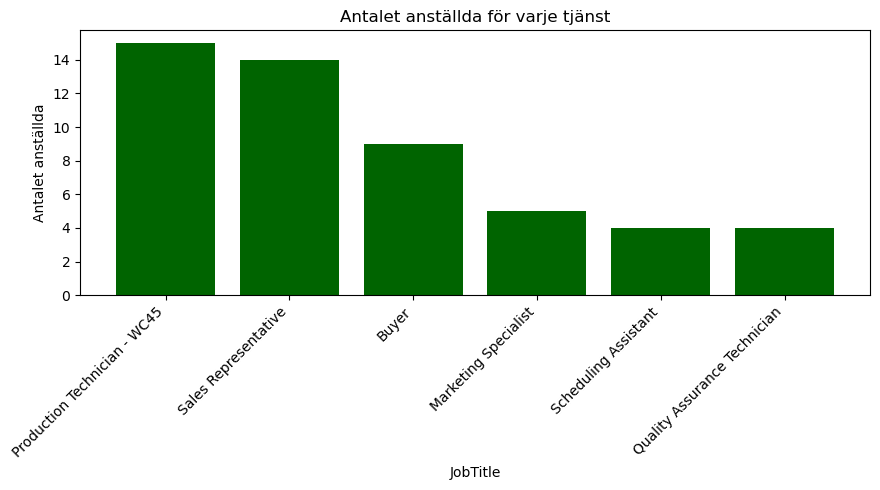

In [174]:
Employees = view.sort_values(by='nbr', ascending=False)
x = Employees['JobTitle']
y = Employees['nbr']

plt.figure(figsize=(9, 5))
plt.bar(x, y, color='darkgreen')
plt.xlabel("JobTitle")
plt.ylabel("Antalet anställda")
plt.title("Antalet anställda för varje tjänst") 
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


Med hjälp av matplotlib kan man visualisera tabellen som vi har ovan i form av en stapeldiagram. Vi har antalet anställda på y-axeln och de 6 olika tjänsterna på x-axeln. Dessutom har jag rangordnat datan efter antalet anställda (nbr) och i fallande ordning.

In [94]:
multijoin_query = """
SELECT 
  A.CustomerID, 
  D.Name AS ProductName,
  C.ProductID,
  COUNT(*) AS PurchaseCount
FROM Sales.Customer AS A
INNER JOIN Sales.SalesOrderHeader AS B 
    ON A.CustomerID = B.CustomerID
INNER JOIN Sales.SalesOrderDetail AS C 
    ON B.SalesOrderID = C.SalesOrderID
INNER JOIN Production.Product AS D
    ON C.ProductID = D.ProductID
WHERE C.ProductID = '873'
GROUP BY A.CustomerID, D.Name, C.ProductID
ORDER BY PurchaseCount DESC;
"""
join_df = pd.read_sql(multijoin_query, con=connection)
join_df.head(12)

,CustomerID,ProductName,ProductID,PurchaseCount
0,11091,Patch Kit/8 Patches,873,10
1,11331,Patch Kit/8 Patches,873,10
2,11262,Patch Kit/8 Patches,873,9
3,11176,Patch Kit/8 Patches,873,9
4,11287,Patch Kit/8 Patches,873,8
5,11566,Patch Kit/8 Patches,873,8
6,11276,Patch Kit/8 Patches,873,7
7,11203,Patch Kit/8 Patches,873,7
8,11185,Patch Kit/8 Patches,873,7
9,11277,Patch Kit/8 Patches,873,6


# 
I tabellen ovan ser vi vilka kunder som har beställt en viss produkt med namnet (Patch Kit/8 Patches) och ProductID (873) mest. Med denna query har jag kunnat lista ut topp 12 kunder som har beställt produkten mest. Exempelvis har vi kunder med CustomerID (11091) och (11331) som ligger på topp i antalet ordrar av produkten med 10 beställningar var. Jag har specifikt valt ut CustomerID, ProductName, C.ProductID och räknade ut hur många antal produkter varje kund har köpt med hjälp av (COUNT(*) AS PurchaseCount). Sen joinade jag mellan de relevanta tabellerna i denna queryn och använde WHERE funktionen för att filtrera förfrågan efter produkten som jag är intresserad över (873).

In [ ]:
Sales_Employee = """ 
SELECT TOP 10
  A.FirstName + ' ' + A.LastName as [Employee name],
  B.BusinessEntityID,
  ROUND(B.SalesYTD, 0) AS [TotalSalesYTD]
FROM Sales.SalesPerson AS B
JOIN Person.Person AS A ON B.BusinessEntityID = A.BusinessEntityID
ORDER BY B.SalesYTD DESC;
 """
view = pd.read_sql(sql=Sales_Employee, con=connection)
view

,Employee name,BusinessEntityID,TotalSalesYTD
0,Linda Mitchell,276,4251369.0
1,Jae Pak,289,4116871.0
2,Michael Blythe,275,3763178.0
3,Jillian Carson,277,3189418.0
4,Ranjit Varkey Chudukatil,290,3121616.0
5,José Saraiva,282,2604541.0
6,Shu Ito,281,2458536.0
7,Tsvi Reiter,279,2315186.0
8,Rachel Valdez,288,1827067.0
9,Tete Mensa-Annan,284,1576562.0


Tabellen visar oss de 10 topp anställda som har sålt mest sen början av kalenderåret (SalesYTD). På första platsen har vi Linda Mitchell som har sålt totalt 4 251 369. På tionde platsen har vi Tete Mensa-Annan som totalt har sålt 1 576 562. Från tabellen kan vi understrycka att det inte råder några avvikelser eller extrema värden mellan de 10 topp anställda i förhållande till den totala försäljningen senaste året, utan de olika värden ligger rätt nära varandra. Tabellen kan vara en indikation på vilka som har presterat bäst det senaste kalenderåret i datan.

In [ ]:
join_sql = """ 
SELECT TOP 10
  A.BusinessEntityID,
  B.FirstName + ' ' + B.LastName as [Employee Name],
  A.JobTitle,
  A.Gender,
  A.BirthDate
FROM HumanResources.Employee AS A
JOIN Person.Person AS B ON A.BusinessEntityID = B.BusinessEntityID
WHERE B.PersonType = 'EM'
Order by BirthDate;
 """
df = pd.read_sql(sql=join_sql, con=connection)
df

,BusinessEntityID,Employee Name,JobTitle,Gender,BirthDate
0,84,Frank Martinez,Production Technician - WC40,M,1952-03-02
1,256,Frank Pellow,Buyer,M,1952-05-12
2,5,Gail Erickson,Design Engineer,F,1952-09-27
3,140,Prasanna Samarawickrama,Production Technician - WC20,M,1953-04-30
4,231,Jo Berry,Janitor,F,1954-04-24
5,63,Maciej Dusza,Production Technician - WC60,M,1955-01-30
6,40,JoLynn Dobney,Production Supervisor - WC60,F,1956-01-16
7,49,Barry Johnson,Production Technician - WC10,M,1956-03-26
8,53,Diane Glimp,Production Technician - WC10,F,1956-03-29
9,55,Taylor Maxwell,Production Supervisor - WC50,M,1956-04-01


Tabellen visar vilka de 10 äldsta anställda i företaget är, rangordnat efter deras födelsedag. Den visar också deras jobtitle ooch vilken kön de tillhör. Man skulle kunna använda tabellen för att forska vidare om ålder eller kön har någon korrelation till hur mycket man tjänar eller något annat variabel man vill studera. Genom att använda WHERE funktionen har jag kunnat filtrera förfrågan efter endast anställda (EM) eftersom Person.Person tabellen innehåller personer som antingen är kunder eller har andra roller i företaget.

In [182]:
Sold_Products = """
SELECT TOP 10
 A.Name AS ProductName,
 A.ProductID,
 SUM(OrderQty) AS TotalQuantitySold
FROM Sales.SalesOrderDetail AS B
JOIN 
 Production.Product AS A ON B.ProductID = A.ProductID
GROUP BY A.ProductID, A.Name
ORDER BY TotalQuantitySold DESC
 """
join_df = pd.read_sql(sql = Sold_Products, con=connection)
join_df

,ProductName,ProductID,TotalQuantitySold
0,AWC Logo Cap,712,8311
1,Water Bottle - 30 oz.,870,6815
2,"Sport-100 Helmet, Blue",711,6743
3,"Long-Sleeve Logo Jersey, L",715,6592
4,"Sport-100 Helmet, Black",708,6532
5,"Sport-100 Helmet, Red",707,6266
6,"Classic Vest, S",864,4247
7,Patch Kit/8 Patches,873,3865
8,"Short-Sleeve Classic Jersey, XL",884,3864
9,"Long-Sleeve Logo Jersey, M",714,3636


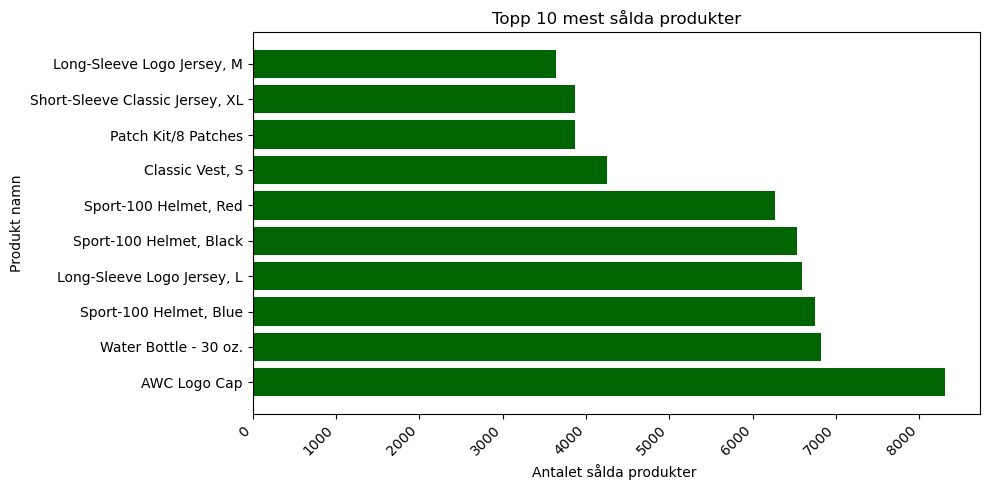

In [188]:
top_products = join_df.sort_values(by='TotalQuantitySold', ascending=False)
x = top_products['TotalQuantitySold']
y = top_products['ProductName']

plt.figure(figsize=(10, 5))
plt.barh(y, x, color='darkgreen')
plt.xlabel("Antalet sålda produkter ")
plt.ylabel("Produkt namn")
plt.title("Topp 10 mest sålda produkter")
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


In [ ]:
Avg_Purchase = """
SELECT 
COUNT(DISTINCT c.CustomerID) AS [Nbr of Customers],
sp.CountryRegionCode AS Country, 
AVG(soh.TotalDue) AS AveragePurchaseAmount
FROM Sales.SalesOrderHeader soh
JOIN Sales.Customer c ON soh.CustomerID = c.CustomerID
JOIN Person.Address a ON c.PersonID = a.AddressID
JOIN Person.StateProvince sp ON a.StateProvinceID = sp.StateProvinceID
WHERE sp.CountryRegionCode = 'US' OR sp.CountryRegionCode = 'FR'
GROUP BY sp.CountryRegionCode
ORDER BY AveragePurchaseAmount DESC;
"""
df = pd.read_sql(sql = Avg_Purchase, con=connection)
df

,Nbr of Customers,Country,AveragePurchaseAmount
0,4405,US,5949.0527
1,909,FR,1862.9284


I denna queryn har jag valt att jämföra kundernas genomsnittliga köpsumman mellan USA och Frankrike. Jag kom fram till att den totala genomsnittliga köpsumman ligger någorlunda högre i USA jämfört med Frankrike. Kunder i Frankrike spenderar dock $0,92 högre än USA med avseende på antalet kunder i båda länderna. Konsumenter i USA spenderar i genomsnitt $1.35 (5949/4405) per person jämfört med konsumenter i Frankrike som spenderar i genomsnitt $2.27 (1863/909) per person.

In [164]:
Yearly_Trend_US = """
SELECT 
    Year(soh.OrderDate) AS Year, 
    ROUND(SUM(soh.TotalDue), 0) AS TotalSales,
	sp.CountryRegionCode
FROM Sales.SalesOrderHeader soh
INNER JOIN Person.Address a 
    ON soh.BillToAddressID = a.AddressID
INNER JOIN Person.StateProvince sp
    ON a.StateProvinceID = sp.StateProvinceID
WHERE sp.CountryRegionCode = 'US'
GROUP BY Year(soh.OrderDate), sp.CountryRegionCode
ORDER BY TotalSales DESC;
"""
data = pd.read_sql(sql = Yearly_Trend_US, con=connection)
data

,Year,TotalSales,CountryRegionCode
0,2013,26044344.0,US
1,2012,24606759.0,US
2,2014,10733041.0,US
3,2011,9445719.0,US


Här ovan har vi en förfrågan som går ut på att ta reda på den årliga totala försäljningstrenden i den Amerikanska marknaden mellan 2011 och 2014. Jag har joinat ihop kolumner från tabeller som Sales.SalesOrderHeader, Person.Address, Person.StateProvince för att få reda på den totala försäljningen per år och specifikt för USA. Därefter grupperade jag datan baserade på årtal och region

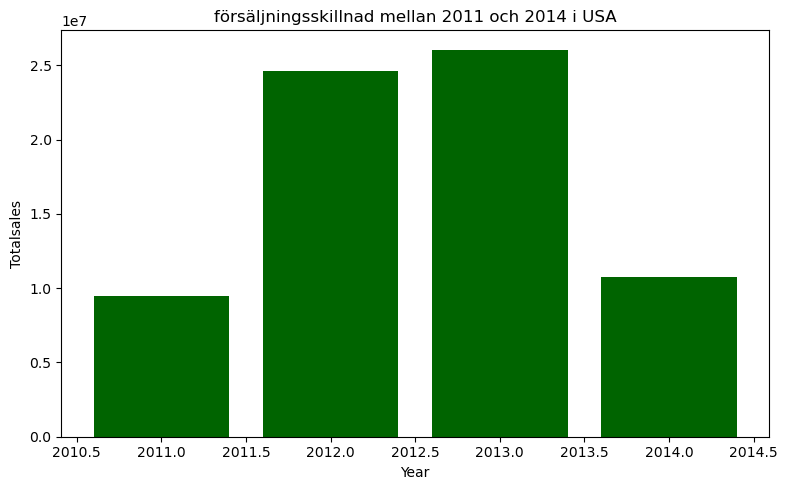

In [ ]:
Sales_Trend = data.sort_values(by='TotalSales')
x = Sales_Trend['Year']
y = Sales_Trend['TotalSales']

plt.figure(figsize=(8, 5))
plt.bar(x, y, color='darkgreen')
plt.xlabel("Year")
plt.ylabel("Totalsales")
plt.title("försäljningsskillnad mellan 2011 och 2014 i USA")
plt.tight_layout()
plt.show()

För att kunna visualisera vår query ovan har jag använt mig av matplotlib och valde då att göra detta i form av en stapeldiagram. Med hjälp av (data.sort_values) hämtar man datan (resultatet) från queryn och sorterar datan utifrån den totalaförsäljningen eller årtal. (plt.figure) hanterar bredden och höjden för en snyggare visalisering på vår diagram.

In [129]:
mean = data['TotalSales'].mean()
std_dev = data['TotalSales'].std(ddof=1)

print(f"Medelvärdet: {mean}")
print(f"Standardavvikelsen: {std_dev}")

Medelvärdet: 17707465.75
Standardavvikelsen: 8831814.578733085


In [181]:
# 95% signifikansnivån.

z_värde = 1.96 
mean = data['TotalSales'].mean()
std_dev = data['TotalSales'].std(ddof=0)
n = 4

nedre_intervall = mean - z_värde * std_dev / math.sqrt(n)
övre_intervall = mean + z_värde * std_dev / math.sqrt(n)

print(f"Konfidensintervallet ligger mellan: [{nedre_intervall} och {övre_intervall}]")

Konfidensintervallet ligger mellan: [10211861.479037322 och 25203070.020962678]


##
Resultatet visar att den genomsnittliga totalaförsäljningen i USA mellan 2011 och 2014 ligger med 95% konfidensintervall mellan intervallen 10 211 861 och 25 203 070. Jag utgår ifrån en z-fördelning med ett känd populations standardavvikelse då jag anser att datan representerar hela populationen i databasen.

In [ ]:
Gender_wage = """
SELECT TOP 10
	b.FirstName + ' ' + b.LastName as [Employee Name],
	e.JobTitle,
    ROUND((eph.Rate), 0) AS [Hourly Rate],
	e.Gender
FROM HumanResources.EmployeePayHistory AS eph
JOIN HumanResources.Employee AS e on eph.BusinessEntityID = e.BusinessEntityID
JOIN Person.Person as b on e.BusinessEntityID = b.BusinessEntityID
WHERE
    eph.RateChangeDate = (
        SELECT MAX(RateChangeDate)
        FROM HumanResources.EmployeePayHistory
        WHERE BusinessEntityID = eph.BusinessEntityID)
ORDER BY eph.Rate DESC;
"""
data = pd.read_sql(sql = Gender_wage, con=connection)
data

,Employee Name,JobTitle,Hourly Rate,Gender
0,Ken Sánchez,Chief Executive Officer,126.0,M
1,James Hamilton,Vice President of Production,84.0,M
2,Brian Welcker,Vice President of Sales,72.0,M
3,Terri Duffy,Vice President of Engineering,63.0,F
4,Laura Norman,Chief Financial Officer,60.0,F
5,Jean Trenary,Information Services Manager,50.0,F
6,Dylan Miller,Research and Development Manager,50.0,M
7,Syed Abbas,Pacific Sales Manager,48.0,M
8,Amy Alberts,European Sales Manager,48.0,F
9,Stephen Jiang,North American Sales Manager,48.0,M


I denna delen har jag valt att studera om det råder något samband mellan timlön och kön gällande företagets anställda. I min analys har jag endast utgått ifrån de 10 topp mest tjänade anställda i företaget. Om man tittar på tabellen ovan kan man redan konstatera att de 3 topp anställda som tjänar mest i företaget är män. Dock kan man inte fastställa utifrån tabellen om detta har någon koppling till vilken kön man tillhör, utan behöver man genomföra ytterligare analys för att avgöra om det verkligen råder något samband mellan dessa två variabler. För att komma fram till den här tabellen har jag valt ut relevanta kolumner genom att joina HumanResources.EmployeePayHistory, Person.Person och HumanResources.Employee tabeller. Slutligen filtrerade jag queryn så att jag fick endast den högst tjänade timlönen för varje anställd. 

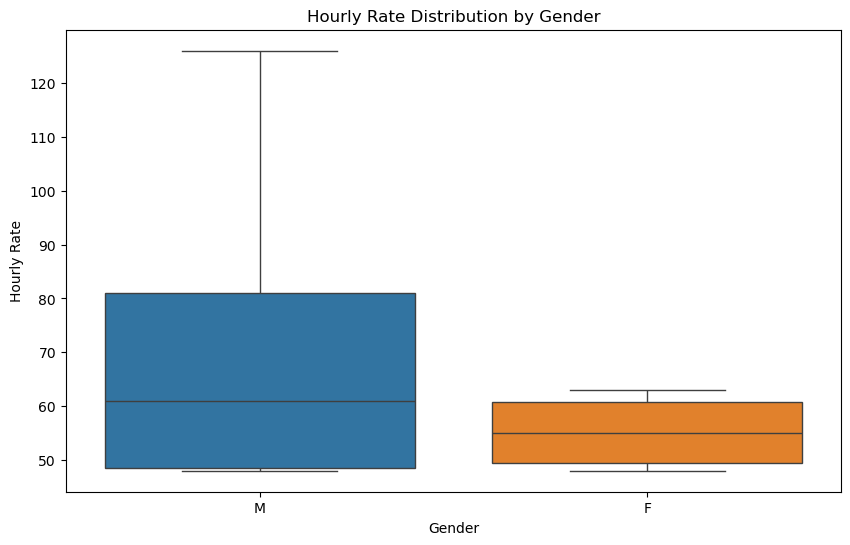

In [ ]:
male_rates = data[data['Gender'] == 'M']['Hourly Rate']
female_rates = data[data['Gender'] == 'F']['Hourly Rate']

plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Hourly Rate', data=data,hue='Gender')
##sns.boxplot(x='Gender', y='Hourly Rate', data=data, palette='coolwarm')
plt.title("Hourly Rate Distribution by Gender")
plt.ylabel("Hourly Rate")
plt.xlabel("Gender")
plt.show()

In [175]:
print(f"Average male rate = {male_rates.mean()} and Average female rate = {female_rates.mean()}")
print(f"Median male rates = {male_rates.median()} and Median female rate = {female_rates.median()}")
print(f"Max male rates = {male_rates.max()} and Max female rates = {female_rates.max()}")
print(f"Min male rates = {male_rates.min()} and Min female rates = {female_rates.min()}")

Average male rate = 71.33333333333333 and Average female rate = 55.25
Median male rates = 61.0 and Median female rate = 55.0
Max male rates = 126.0 and Max female rates = 63.0
Min male rates = 48.0 and Min female rates = 48.0


Här valde jag att visualisera datan som vi fick fram i vår tabell i form av en candlestick-diagram. Vi kan exempelvis se att den högst tjänade man och kvinna i företaget har ungefär 126 respektive 63 i timlön, vilket är dubellt så mycket skillnad i timlön. Medianen ligger ungefär 61 i timlön för de manliga respektive 55 för de kvinnliga anställda. Nånitng som inte visas i diagramet men som kan vara intressant är den genomsnittliga timlönen för respektive kön. Gneomsnittet för de manliga anställda ligger runt 71 medan för det ligger runt 55 för de kvinnliga anställda. Genomsnittet och medianen för de kvinnliga anställda är ungefär samma medan det finns 10 i timlön skillnad mellan genomsnittet och medianen för de manliga anställda. Detta kan bero på den eventuellt extrema värden i vår tabell som är 126 för den mest tjänade personen i företaget. Det kan förvränga tolkningen av resultatet i en analys eftersom medelvärdet är ett ganska känsligt mått när det kommer till extrema värden i en data.

In [177]:
t_stat, p_value = ttest_ind(male_rates, female_rates)

print(f"t_stat = {t_stat}"),
print(f"p_value = {p_value}")
print()

alpha = 0.05     # 95% konfidensintervall

if p_value > alpha:
    print(f"Det råder inget signifikant samband mellan timlön och kön vid en {alpha * 100}% signifikansnivå.")
else:
    print(f"Det råder ett signifikant samband mellan timlön och kön vid en {alpha * 100}% signifikansnivå.")

t_stat = 1.0113083937858176
p_value = 0.3414748362343398

Det råder inget signifikant samband mellan timlön och kön vid en 5.0% signifikansnivå.


För att studera sambandet mellan timlön och kön på djupet har jag framställt en hypotesprövning där, nollhypotesen är att det råder inget signifikant samband mellan variablerna, och mothypotesen är att det finns ett signifikant samband mellan variablerna. För att beräkna t-värdet och p-värdet har jag använt mig av scipy.stats biblioteket och fick fram en t-fördelning på 1.01 och p-värdet på 0.34. För att avgöra om resultatet är signifikant eller inte, utgår jag ifrån en konfidensintervall på 95%. Det innebär att om p-värdet är mindre än vårt signifikansnivå som är 0.05, så råder det ett signifikant samband mellan våra två variabler och då förkastar vi nollhypotesen. I det här fallet så är p-värdet mycket större än vårt signifikantnivå, vilket betyder att det inte råder något signifikant samband mellan timlön och kön. Därför förkastar vi inte nollhypotesen.

## Slutsatser och rekommendationer

Man kan dra slutsatsen att det finns en stark indikation på att det inte råder något signifikant samband mellan hur mycket man tjänar och vilken kön man tillhör i företaget. Dock är det viktigt att poängtera att vå urval utgår endast utifrån de topp 10 anställda som tjänar mest i företaget vilket är en ganska liten stickprov att utgå ifrån och förmodligen inte ger en rättvis bild av hela populationen. Därför skulle jag rekommendera att man gör en större analys och utgår ifrån en bredare urval i en framtida undersökning. Dessutom skulle man också kunna utesluta extrema värden som kan komma att förvränga resultatet av en analys och troligtvis komma fram till felaktiga slutsatser.

## Executive summary

I min omfattande analys av databasen har jag kunnat konstatera att datan innehåller information bland annat om företagets anställda, kunder, produkter, försäljning, avdelningar osv. Den innehåller även data om personliga upppgifter om de anställda och företagets kunder såsom deras för- och efternamn, vilket land som kommer ifrån, deras jobbtitlar och födelsedagar. Från databasen kan man exempelvis exekvera information om vilka produkter som säljer mest, vilka anställda som presterar bäst i företaget, vilka produkter eller regioner som har varit mest lönsamma genom åren. Dessutom kan man studera samband mellan olika variabler som man tycker kan vara intressanta att ta reda på såsom att studera sambandet mellan hur mycket man tjänar och vilken kön man tillhör eller om det finns någon korrelation mellan produktpriserna och försäljningsvolymerna. Ytterligare skulle man kunna göra framtida utsikter och förutspå kommande trender på marknaden baserat på historisk data. Man skulle kunna framställa detta med hjälp av olika analysmetoder som tiddserieanalys, regressionsanalys eller Machine Learning. 

## Självvärdering

1. Den största utmaningen med detta arbete har varit att genomföra den statistiska analysdelen och vilken analysmetod som var mest passande att utgå ifrån. En annan utmaning på en mindre skala har varit att förstå hur man skulle göra själva uppkopplingen till databasen men med hjälp av några sökningar har man kunnat få en bättre förståelse för hur det fungerar.

2. Det är svårt att själv bedöma hur bra man har presterat men man kan väl alltid hoppas att det blir en VG.

3. Största tipset jag hade velat höra i början av varje kurs är väl att följa kursschemat och läsa på innan varje föreläsningsmoment så att man är förberedd på vad som kommer komma på föreläsningen. Det gör också att man hänger med genom hela föreläsningen och är mer delaktigt i diskussionen.

Den muntliga presentationen av arbetet genomfördes fredagen 2025-01-03 i grupp.
